In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('./data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
## Used to check for no of unique values present
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
## checking the unique values in each categories
print("Categories in gender variable",end=" ")
print(df['gender'].unique())
print("Categories in race_ethnicity variable",end=" ")
print(df['race_ethnicity'].unique())
print("Categories in parental_level_of_education variable",end=" ")
print(df['parental_level_of_education'].unique())
print("Categories in lunch variable",end=" ")
print(df['lunch'].unique())
print("Categories in test_preparation_course variable",end=" ")
print(df['test_preparation_course'].unique())


Categories in gender variable ['female' 'male']
Categories in race_ethnicity variable ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable ['standard' 'free/reduced']
Categories in test_preparation_course variable ['none' 'completed']


In [10]:
## defining numerical and categorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype == 'O']


In [11]:
## Print the numerical and categorical features
print('We have {} numerical features :{}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features :{}'.format(len(categorical_feature),categorical_feature))

We have 3 numerical features :['math_score', 'reading_score', 'writing_score']
We have 5 categorical features :['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']

In [13]:
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full=df[df['reading_score']==100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')


Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [15]:
reading_less_20=df[df['reading_score']<=20]['average'].count()
writing_less_20=df[df['writing_score']<=20]['average'].count()
math_less_20=df[df['math_score']<=20]['average'].count()

print(f'Number of student with less than 20 marks in Maths :{math_less_20}')
print(f'Number of student with less than 20 marks in Writing :{writing_less_20}')
print(f'Number of student with less than 20 marks in Reading :{reading_less_20}')

Number of student with less than 20 marks in Maths :4
Number of student with less than 20 marks in Writing :3
Number of student with less than 20 marks in Reading :1


In [16]:
import seaborn as sns

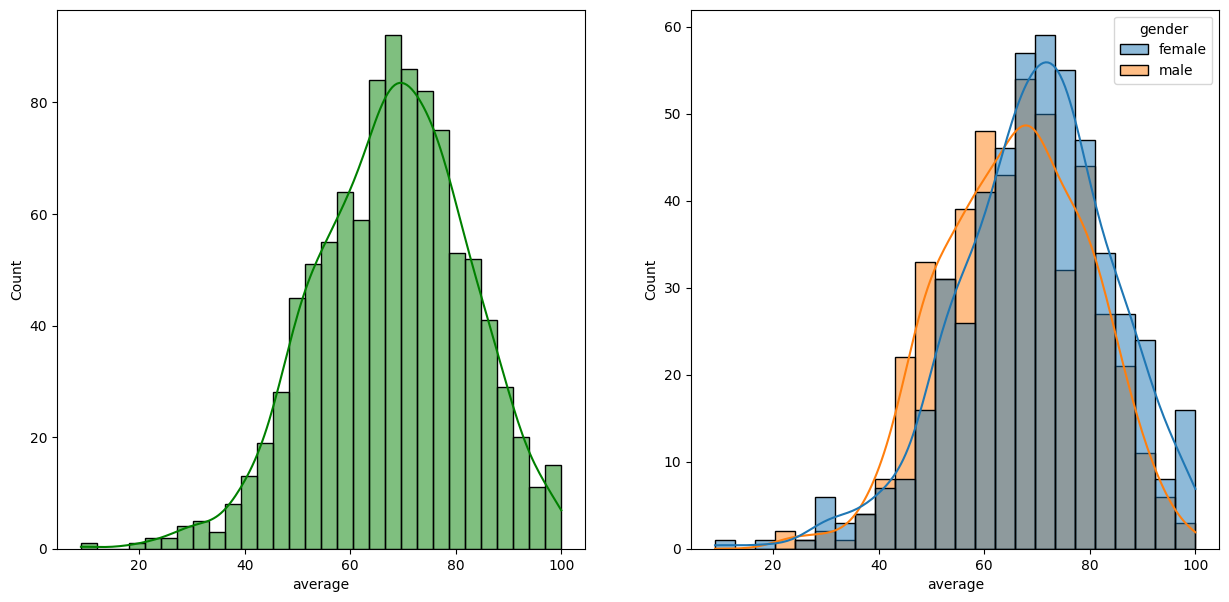

In [17]:
## Histogram & KDE
fig,axs =plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

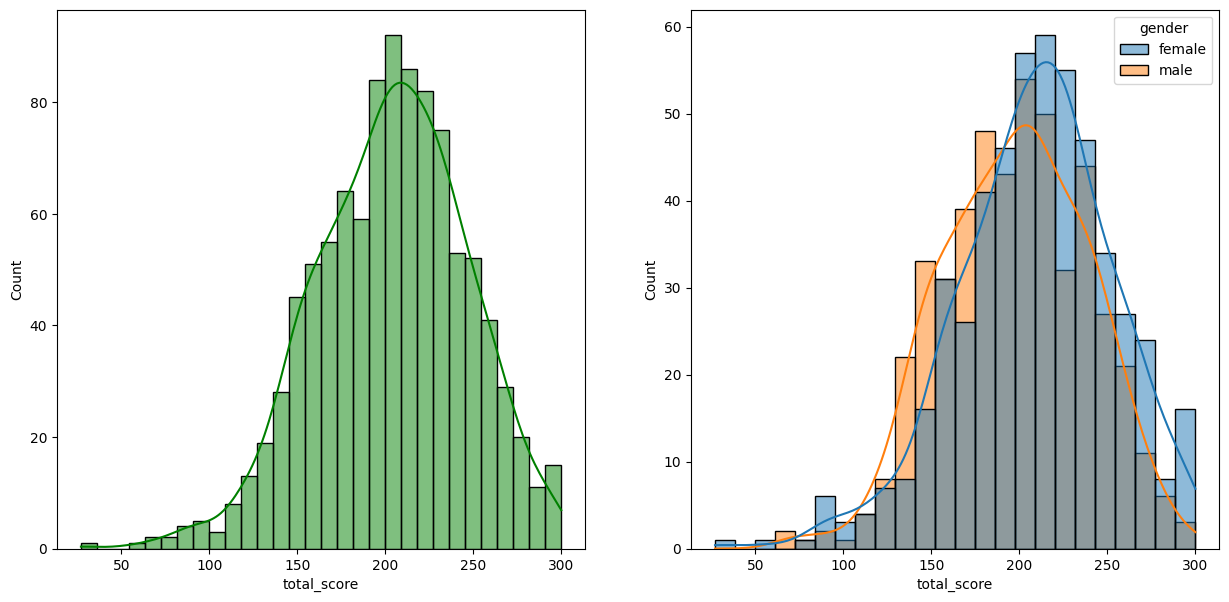

In [18]:
fig,axs =plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

Checking Outliers

Very Important step for data visulaization

Using Boxplot for outlier visualization

<Axes: ylabel='average'>

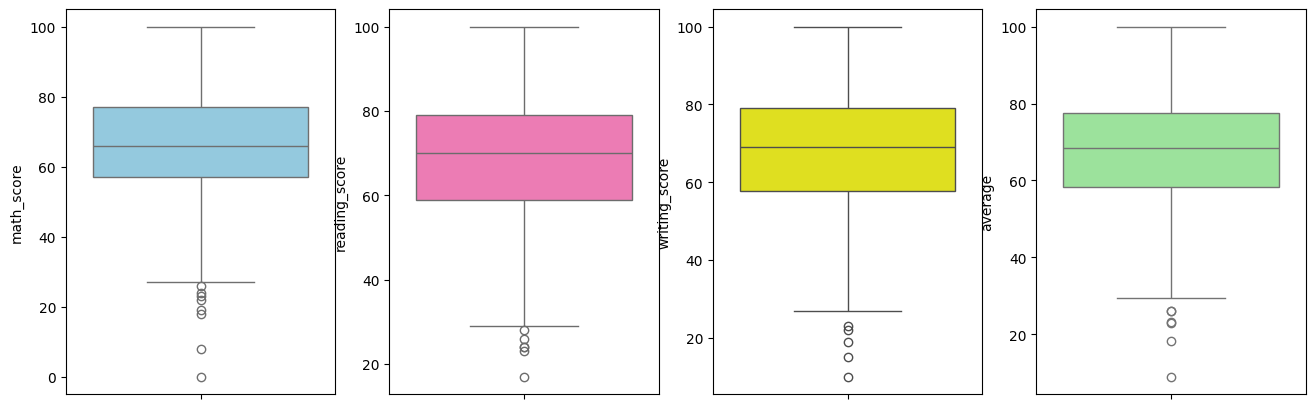

In [21]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')